In [7]:
import cv2
import numpy as np
from skimage import filters
import os
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import pywt
from scipy.fftpack import dct, idct
from sklearn.metrics import mean_squared_error


In [25]:
output_dir = "assignment_2_outputs"

# Load images in grayscale
img1 = cv2.imread("C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/a1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/a2.png", cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print("Error loading images. Please check the file paths.")
    exit()

cv2.imwrite(f"assignment_2_outputs/img1_gray.png",img1)
cv2.imwrite(f"assignment_2_outputs/img2_gray.png",img2)

images = [img1, img2]
image_names = ["image1", "image2"]

# Step 2: Apply edge detection filters
def apply_edge_detection(image, step_name):
    # Sobel filter
    sobel_edges = filters.sobel(image)
    cv2.imwrite(f"{output_dir}/{step_name}_sobel.png", (sobel_edges * 255).astype('uint8'))

    # Roberts filter
    roberts_edges = filters.roberts(image)
    cv2.imwrite(f"{output_dir}/{step_name}_roberts.png", (roberts_edges * 255).astype('uint8'))

    # Prewitt filter
    prewitt_edges = filters.prewitt(image)
    cv2.imwrite(f"{output_dir}/{step_name}_prewitt.png", (prewitt_edges * 255).astype('uint8'))

# Step 3: Blur the images using three different kernel sizes
def blur_images(image, kernel_sizes, base_name):
    blurred_images = []
    for k in kernel_sizes:
        blurred = cv2.GaussianBlur(image, (k, k), 0)
        blurred_images.append(blurred)
        cv2.imwrite(f"{output_dir}/{base_name}_blurred_{k}.png", blurred)
    return blurred_images

def extract_msb(image):
    msb_img = (image >= 128).astype(np.uint8) * 255  # Extract MSB (0 or 255)
    cv2.imwrite(f"{output_dir}/{base_name}_MSB.png", msb_img)
    return msb_img

# Process each image
kernel_sizes = [3, 5, 7]
for i, img in enumerate(images):
    base_name = image_names[i]

    # Step 2: Edge detection on original image
    apply_edge_detection(img, f"{base_name}_original")

    # Step 3: Blur the image
    blurred_imgs = blur_images(img, kernel_sizes, base_name)

    # Step 4: Apply edge detection on each blurred image
    for j, blurred in enumerate(blurred_imgs):
        apply_edge_detection(blurred, f"{base_name}_blurred_{kernel_sizes[j]}")
    # Step 5: binarize by extracting most significant bit
    msb_img = extract_msb(img)
    # Step 6: apply step 2 to msb image
    apply_edge_detection(msb_img, f"{base_name}_msb")
    # Step 7: Blur the msb images
    blurred_imgs_msb = blur_images(msb_img, kernel_sizes, base_name)
    # Step 8: apply edge detection on blurred msb images
    for k, blurred in enumerate(blurred_imgs_msb):
        apply_edge_detection(blurred, f"{base_name}_blurred_MSB_{kernel_sizes[k]}")



print("Processing complete. Outputs saved in:", output_dir)


Processing complete. Outputs saved in: assignment_2_outputs


In [9]:
img3= cv2.imread("C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/b1.jpg", cv2.IMREAD_COLOR)
img4= cv2.imread("C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/b2.jpg", cv2.IMREAD_COLOR)
img5= cv2.imread("C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/b3.jpg", cv2.IMREAD_COLOR)
img3= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4= cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5= cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

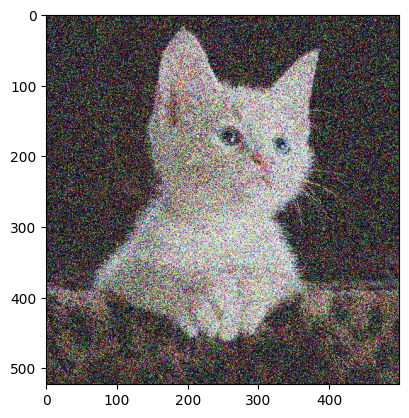

In [10]:
plt.imshow(img4)

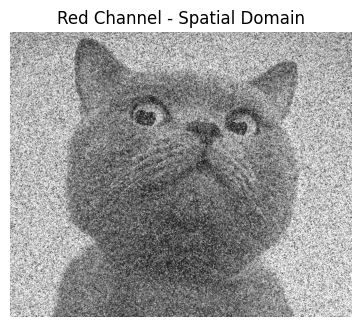

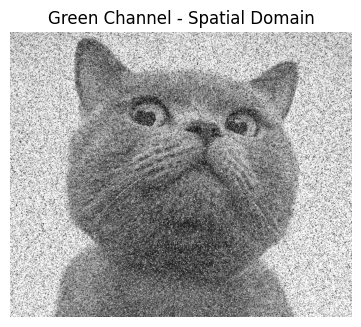

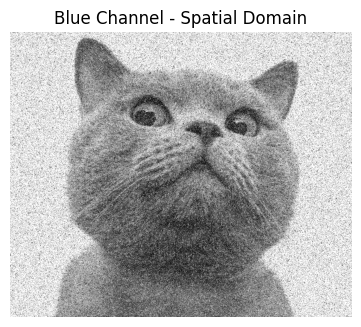

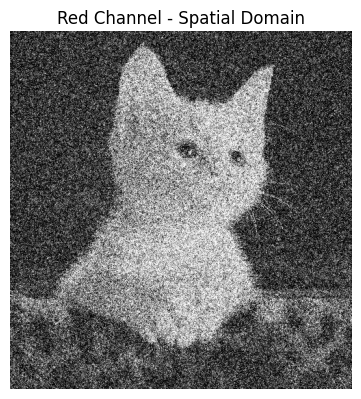

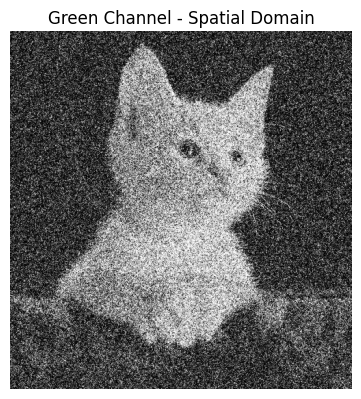

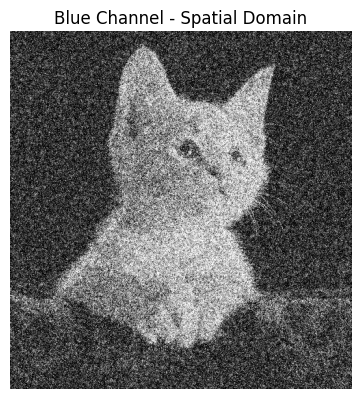

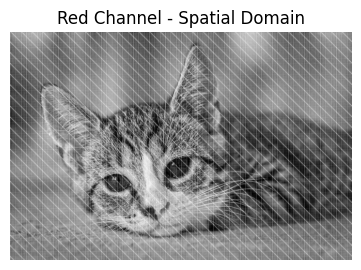

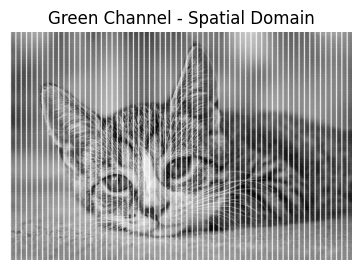

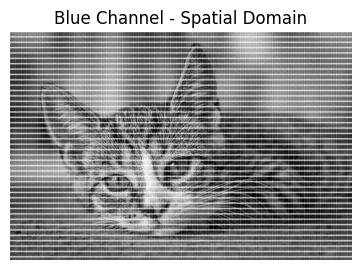

In [11]:
# noise analyis spatial domain
images = [img3, img4, img5]
for i , img in enumerate(images):
        r, g, b = cv2.split(img)
        channel_data = {'Red': r, 'Green': g, 'Blue': b}
        for i, (name, channel) in enumerate(channel_data.items()):
                # Spatial Domain Analysis
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 3, 1)
                plt.title(f"{name} Channel - Spatial Domain")
                plt.imshow(channel, cmap='gray')
                plt.axis('off')
        


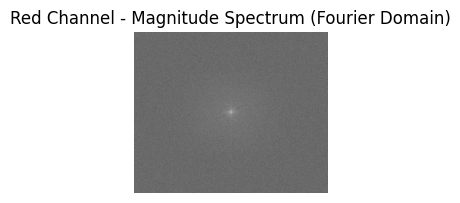

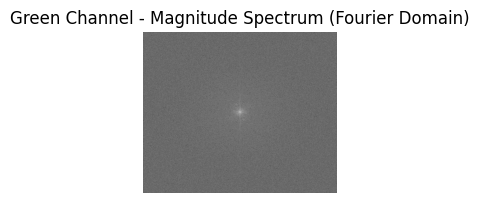

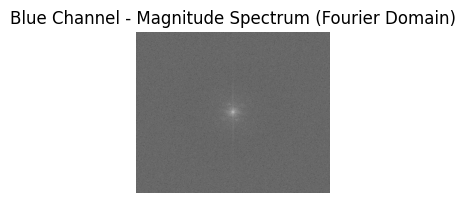

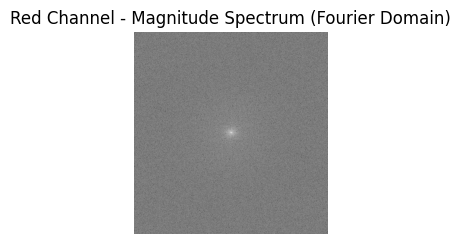

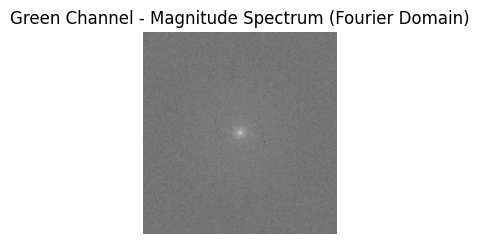

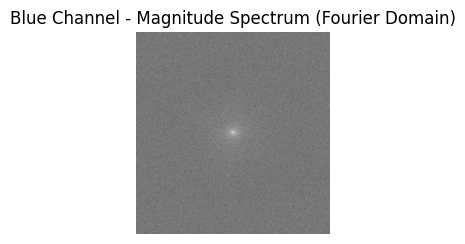

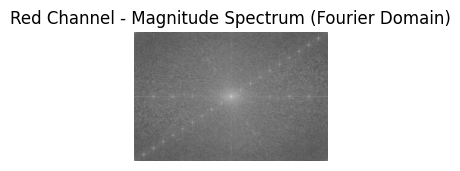

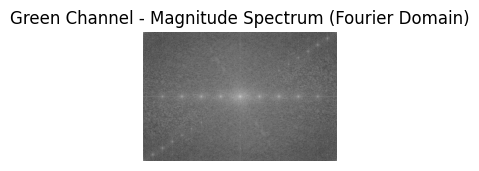

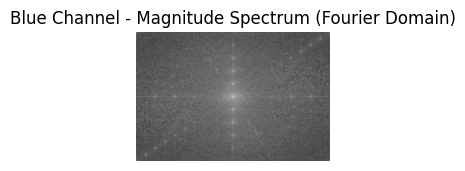

In [12]:
# noise analyis fourier domain
for i , img in enumerate(images):
        r, g, b = cv2.split(img)
        channel_data = {'Red': r, 'Green': g, 'Blue': b}
        for i, (name, channel) in enumerate(channel_data.items()):
                # fourier Domain Analysis
                f_transform = np.fft.fft2(channel)
                f_transform_shift = np.fft.fftshift(f_transform)  # Shift zero frequency to center
                magnitude_spectrum = 20 * np.log(np.abs(f_transform_shift) + 1)

                plt.subplot(1, 3, 2)
                plt.title(f"{name} Channel - Magnitude Spectrum (Fourier Domain)")
                plt.imshow(magnitude_spectrum, cmap='gray')
                plt.axis('off')
                plt.tight_layout()
                plt.show()

In [13]:
# Median filter
for idx, img in enumerate(images):
    r, g, b = cv2.split(img)
    for kernel_size in [3, 5, 7,9]: 
        # Apply Median filter on each channel
        b_median = cv2.medianBlur(b, kernel_size)
        g_median = cv2.medianBlur(g, kernel_size)
        r_median = cv2.medianBlur(r, kernel_size)

        # Merge the filtered channels into a full image
        median_filtered = cv2.merge((r_median, g_median, b_median))
        cv2.imwrite(f"{output_dir}/image{idx+3}_median_{kernel_size}.png", median_filtered)


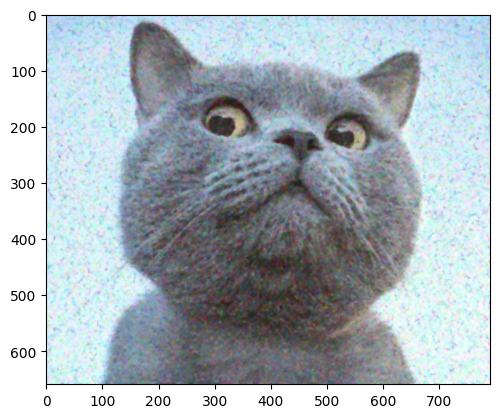

In [14]:
# image 3 seems to be random sandlike noise as the quality improves with higher kernel sizes
R,G,B = cv2.split(img3)
R_median = cv2.medianBlur(R, 7)
G_median = cv2.medianBlur(G, 5)
B_median = cv2.medianBlur(B, 3)
img_median_filtered= cv2.merge((R_median, G_median, B_median))
plt.imshow(img_median_filtered)

In [15]:
# Gaussian filter
for idx, img in enumerate(images):
    r, g, b = cv2.split(img)
    for kernel_size in [(3,3),(5,5), (7,7),(9,9)]: 
        r_gaussian = cv2.GaussianBlur(r, kernel_size, 0)
        g_gaussian = cv2.GaussianBlur(g, kernel_size, 0)
        b_gaussian = cv2.GaussianBlur(b, kernel_size, 0)
        # Merge the filtered channels into a full image
        gaussian_filtered = cv2.merge((r_gaussian, g_gaussian, b_gaussian))
        cv2.imwrite(f"{output_dir}/image{idx+3}_gaussian_{kernel_size}.png", gaussian_filtered)

In [16]:
# low pass filter
def ideal_low_pass_filter(shape, radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= radius:
                mask[i, j] = 1
    return mask

for idx, img in enumerate(images):
    r, g, b = cv2.split(img)
    filtered_channels = []
    filter_mask = ideal_low_pass_filter(img.shape[:2], 30)
    for channel in [r, g, b]:
        channel_float32 = np.float32(channel)
        dft = cv2.dft(channel_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        filtered = dft_shift * filter_mask[:, :, np.newaxis]
        f_ishift = np.fft.ifftshift(filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
        img_back_normalized = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
        filtered_channels.append(np.uint8(img_back_normalized))
    filtered_image = cv2.merge(filtered_channels)
    cv2.imwrite(f"{output_dir}/image{idx + 3}_ilp.png", filtered_image)

    



In [17]:
# band pass filter
def band_pass_filter(shape, low_radius, high_radius):
    rows, cols = shape
    center_row, center_col = cols // 2, rows // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if low_radius <= distance <= high_radius:
                mask[i, j] = 1
    return mask
for idx, img in enumerate(images):
    r, g, b = cv2.split(img)
    filtered_channels = []
    filter_mask = band_pass_filter(img.shape[:2], low_radius= 10, high_radius=100)
    for channel in [r, g, b]:
        channel_float32 = np.float32(channel)
        dft = cv2.dft(channel_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        filtered = dft_shift * filter_mask[:, :, np.newaxis]
        f_ishift = np.fft.ifftshift(filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
        img_back_normalized = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
        filtered_channels.append(np.uint8(img_back_normalized))
    filtered_image = cv2.merge(filtered_channels)
    cv2.imwrite(f"{output_dir}/image{idx + 3}_bp.png", filtered_image)

In [18]:
# band reject filter
# need to find a way to reject horizontal and vertical noise in img5
def band_reject_filter(shape, low_radius, high_radius):
    rows, cols = shape
    center_row, center_col = cols // 2, rows // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if low_radius <= distance <= high_radius:
                mask[i, j] = 0
    return mask
for idx, img in enumerate(images):
    r, g, b = cv2.split(img)
    filtered_channels = []
    filter_mask = band_reject_filter(img.shape[:2], 40, 100)
    for channel in [r, g, b]:
        channel_float32 = np.float32(channel)
        dft = cv2.dft(channel_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        filtered = dft_shift * filter_mask[:, :, np.newaxis]
        f_ishift = np.fft.ifftshift(filtered)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
        img_back_normalized = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
        filtered_channels.append(np.uint8(img_back_normalized))
    filtered_image = cv2.merge(filtered_channels)
    cv2.imwrite(f"{output_dir}/image{idx + 3}_br.png", filtered_image)

In [19]:
print(img3.shape)
print(img4.shape)
print(img5.shape)


(659, 791, 3)
(523, 500, 3)
(427, 640, 3)


In [20]:
img6 = cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/c1.jpg', cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/c2.jpg', cv2.IMREAD_GRAYSCALE)
img8 = cv2.imread('C:/Users/casca/OneDrive/Documenten/image_processing/assignment_2/THE2_Images/THE2_Images/c3.jpg', cv2.IMREAD_GRAYSCALE)
images2 = [img6, img7, img8]

In [21]:
def compress_image(image, transform, n_percent):
    if transform == "wavelet":
        coeffs = pywt.dwt2(image, 'haar')
        LL, (LH, HL, HH) = coeffs
        coefficients = np.hstack([LL.flatten(), LH.flatten(), HL.flatten(), HH.flatten()])
    elif transform == "dct":
        coefficients = dct(dct(image.T, norm='ortho').T, norm='ortho').flatten()

    # Retain N% of coefficients
    k = int(len(coefficients) * n_percent / 100)
    idx = np.argsort(np.abs(coefficients))[-k:]  # Indices of largest coefficients
    retained_coefficients = np.zeros_like(coefficients)
    retained_coefficients[idx] = coefficients[idx]

    # Reshape back for reconstruction
    if transform == "wavelet":
        LL = retained_coefficients[:LL.size].reshape(LL.shape)
        LH = retained_coefficients[LL.size:LL.size+LH.size].reshape(LH.shape)
        HL = retained_coefficients[LL.size+LH.size:LL.size+LH.size+HL.size].reshape(HL.shape)
        HH = retained_coefficients[-HH.size:].reshape(HH.shape)
        compressed_coeffs = (LL, (LH, HL, HH))
        return compressed_coeffs
    elif transform == "dct":
        retained_coefficients = retained_coefficients.reshape(image.shape)
        return retained_coefficients

def reconstruct_image(retained_coefficients, transform):
    if transform == "wavelet":
        return pywt.idwt2(retained_coefficients, 'haar')
    elif transform == "dct":
        return idct(idct(retained_coefficients.T, norm='ortho').T, norm='ortho')

In [24]:
n_values = [1, 10, 50]
for idx, image in enumerate(images2):
    for n in n_values:
        for transform in ['wavelet', 'dct']:
            compressed = compress_image(image, transform, n)
            reconstructed = reconstruct_image(compressed, transform)
            mse = mean_squared_error(image, reconstructed)
            print(f"{transform.upper()} with N={n}% - MSE: {mse}")
            if transform == "wavelet":
                cv2.imwrite(f"{output_dir}/image{idx + 6}_{transform}_compressed_LL_{n}.png", compressed[0])  # Saving only LL part
            else:
                cv2.imwrite(f"{output_dir}/image{idx + 6}_{transform}_compressed_{n}.png", compressed)
            cv2.imwrite(f"{output_dir}/image{idx + 6}_{transform}_reconstructed_{n}.png", reconstructed)

WAVELET with N=1% - MSE: 19662.28410871459
DCT with N=1% - MSE: 324.52488993032347
WAVELET with N=10% - MSE: 5816.864581494931
DCT with N=10% - MSE: 77.20476920978089
WAVELET with N=50% - MSE: 1.573117193863698
DCT with N=50% - MSE: 4.731022187017357
WAVELET with N=1% - MSE: 15515.143341015759
DCT with N=1% - MSE: 35.22223639006919
WAVELET with N=10% - MSE: 6819.524906526557
DCT with N=10% - MSE: 5.471493688939247
WAVELET with N=50% - MSE: 0.053413014993806136
DCT with N=50% - MSE: 0.2686270635304292
WAVELET with N=1% - MSE: 17373.156994740166
DCT with N=1% - MSE: 44.45024225804565
WAVELET with N=10% - MSE: 7689.506054957708
DCT with N=10% - MSE: 7.5536222343664985
WAVELET with N=50% - MSE: 0.011212905248006185
DCT with N=50% - MSE: 0.22209740692666285
